<a href="https://colab.research.google.com/github/elhamod/BA865-2024/blob/main/hands-on/Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's load an image to play with it

Text(0.5, 1.0, 'Original image')

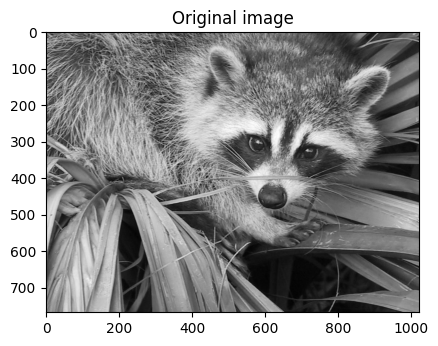

In [2]:
import torch
from PIL import Image
import numpy as np
from scipy.datasets import face
import matplotlib.pyplot as plt

# Load and preprocess the image

# You could try loading your own image
# image = Image.open('path_to_your_image.jpg')
# image = image.convert('L')  # Convert to grayscale
# image = np.array(image) # convert to numpy array

# OR load a racoon image
image = face(gray=True)
image = image / 255.0  # Normalize to [0, 1]
image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions


plt.figure(figsize=(20, 8))
plt.subplot(2,2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original image')

Let's create a kernel

For more info on pytorch convolutions: https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html

For more info on how to construct these filters manually (as opposed to automatically in deep learning), take a look at: https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html#sobel-operator

In [3]:
# Define the kernels for edge detection
vertical_kernel = torch.tensor([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)


import torch.nn.functional as F
vertical_features = F.conv2d(image_tensor, vertical_kernel, padding=1)

In [4]:
vertical_kernel.shape

torch.Size([1, 1, 3, 3])

Text(0.5, 1.0, 'Vertical Features')

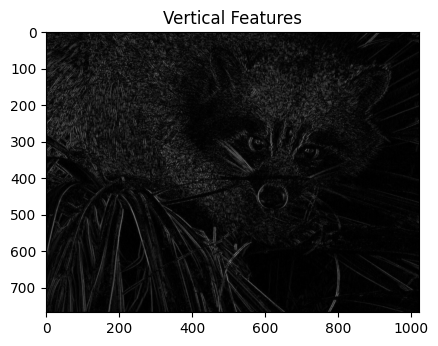

In [5]:
# Visualize the kernels and the output features
plt.figure(figsize=(20, 8))
plt.subplot(2,2, 1)
plt.imshow(np.abs(vertical_features.squeeze().detach().numpy()), cmap='gray') # The absolute value makes edges in both directions (i.e. dark to light and light to dark) yield the same activation
plt.title('Vertical Features')

What about horizontal lines?

In [6]:
horizontal_kernel = torch.tensor([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

horizontal_features = F.conv2d(image_tensor, horizontal_kernel, padding=1)

Text(0.5, 1.0, 'Horizontal Features')

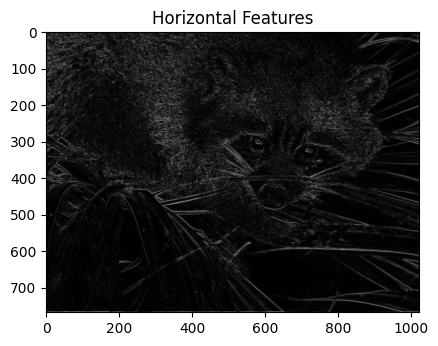

In [7]:
# Visualize the kernels and the output features
plt.figure(figsize=(20, 8))
plt.subplot(2,2, 1)
plt.imshow(np.abs(horizontal_features.squeeze().detach().numpy()), cmap='gray')
plt.title('Horizontal Features')

Show all together

Text(0.5, 1.0, 'Horizontal Features')

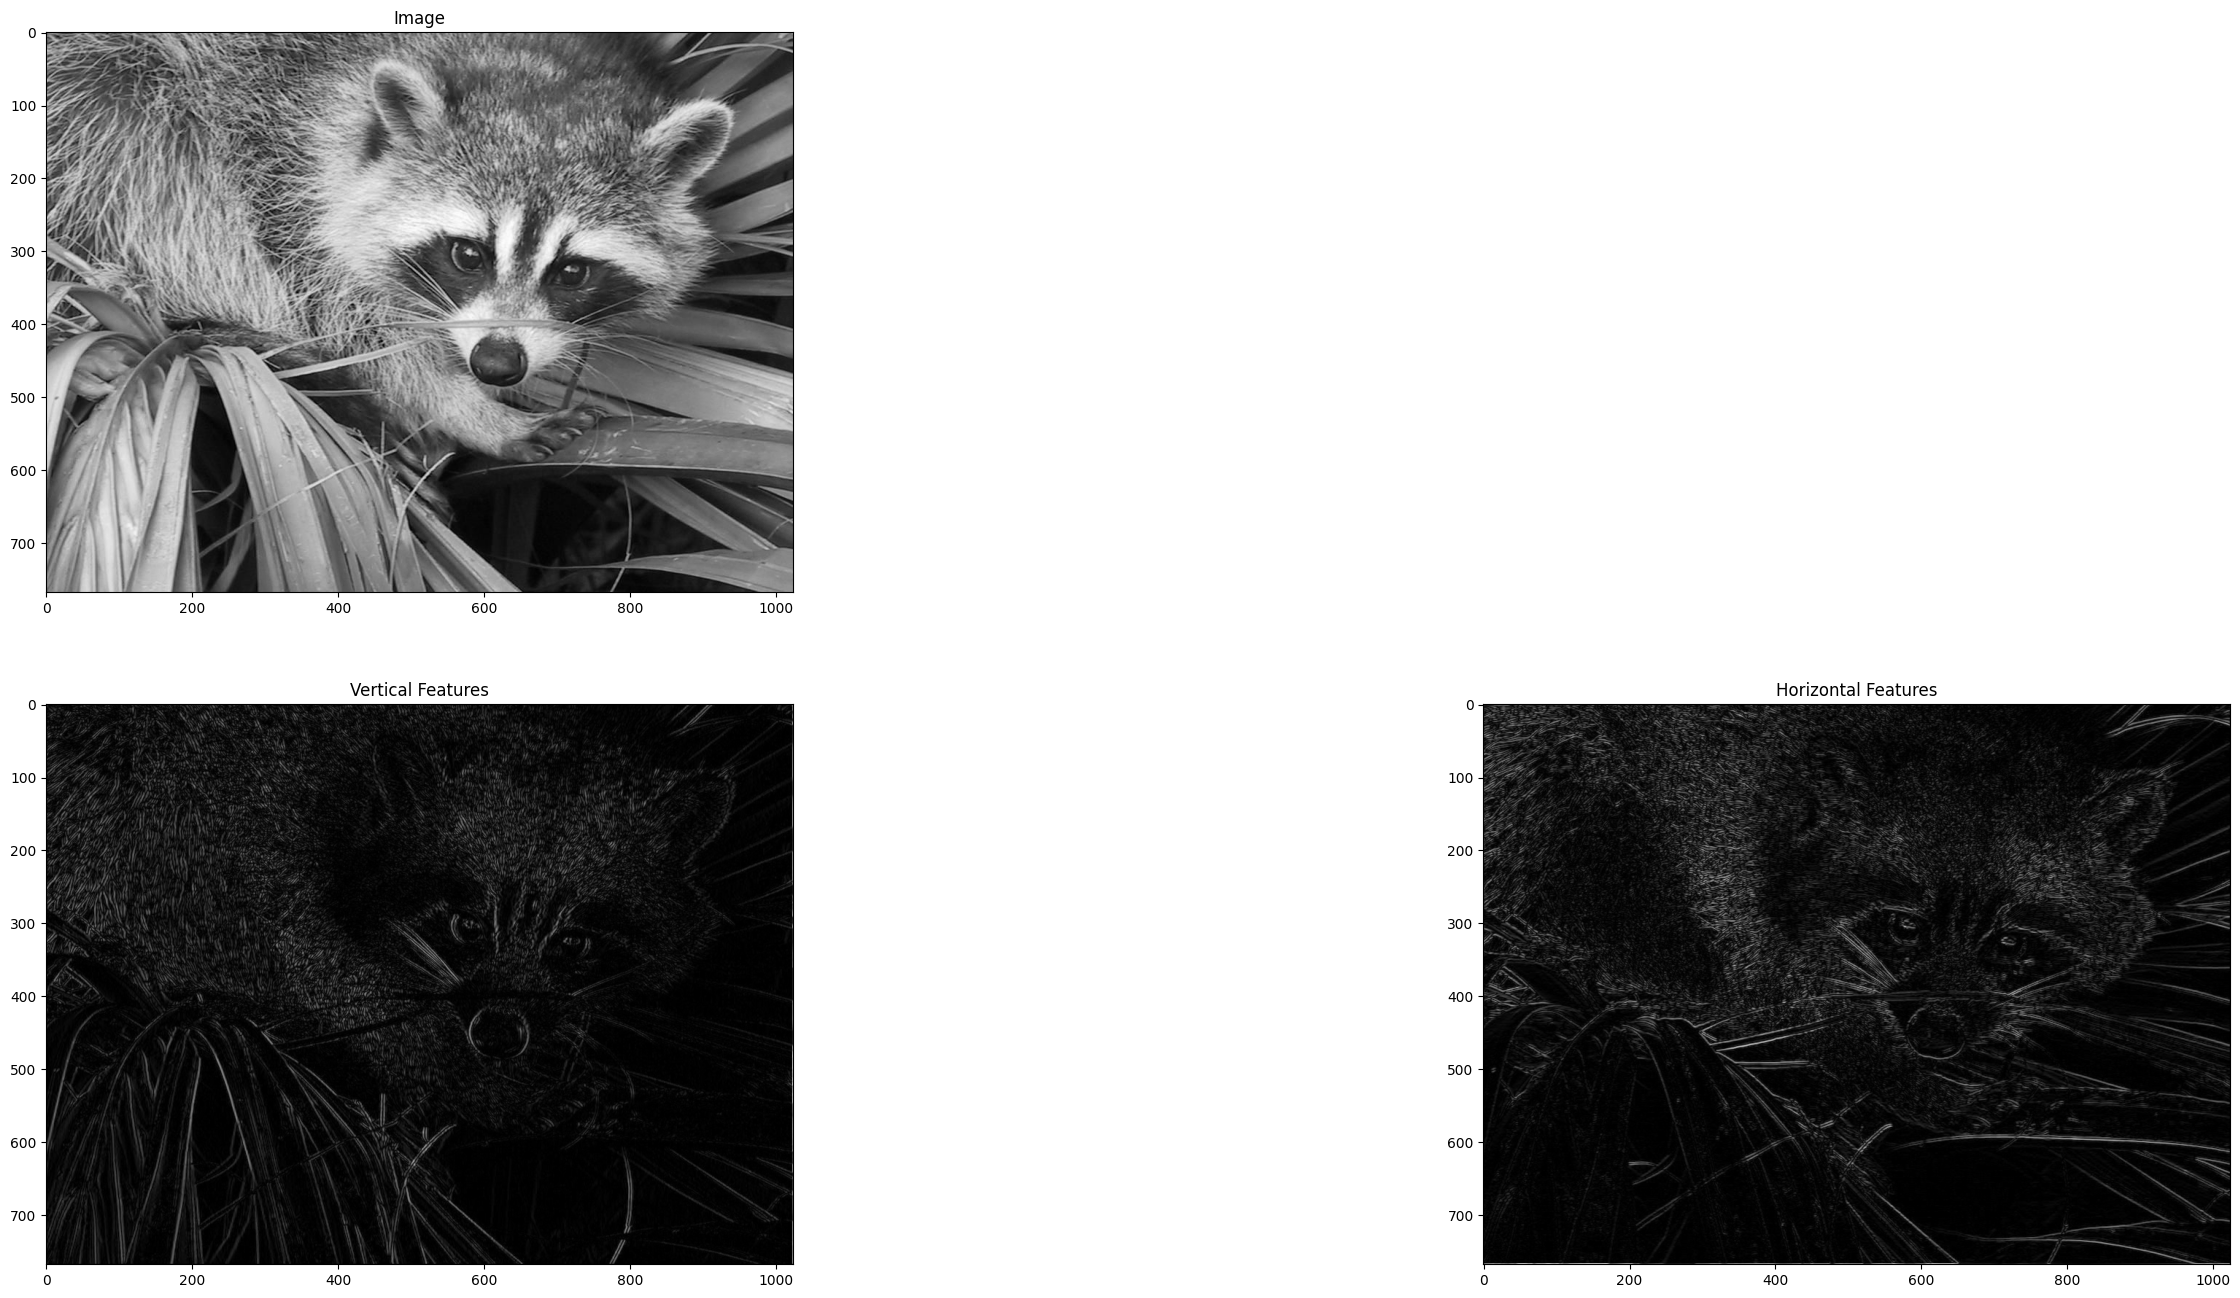

In [8]:
plt.figure(figsize=(34, 16))
plt.subplot(2,2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.subplot(2,2, 3)
plt.imshow(np.abs(vertical_features.squeeze().detach().numpy()), cmap='gray')
plt.title('Vertical Features')
plt.subplot(2,2, 4)
plt.imshow(np.abs(horizontal_features.squeeze().detach().numpy()), cmap='gray')
plt.title('Horizontal Features')

**Things to try:**

- Try different kernel sizes (i.e. different kxk).
- Try a colored image with a 3D kernel.
- Try to construct a kernel that detects blue colors.
- Try to construct a kernel that detects some texture (or lack of).
- Try creating a kernel tensor that has multiple filters and then plot the multiple output feature maps